In [1]:
import quandl

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


This time we get 3 different stocks

In [2]:
disney = quandl.get("EOD/DIS", authtoken="nUnXVC-wyxYCVreWU7nY", start_date="2015-01-01")
disney.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2015-01-02,94.91,95.280,92.8486,93.75,5865382.0,0.0,1.0,89.546606,89.895698,87.601697,88.452158,5865382.0
2015-01-05,93.28,93.350,91.7800,92.38,7789422.0,0.0,1.0,88.008718,88.074762,86.593484,87.159577,7789422.0
2015-01-06,92.57,93.191,91.1570,91.89,6802241.0,0.0,1.0,87.338840,87.924748,86.005690,86.697267,6802241.0
2015-01-07,92.72,93.150,92.1000,92.83,6589438.0,0.0,1.0,87.480364,87.886064,86.895400,87.584148,6589438.0
2015-01-08,93.87,94.300,93.5550,93.79,7571727.0,0.0,1.0,88.565377,88.971078,88.268178,88.489898,7571727.0


In [3]:
micro = quandl.get("EOD/MSFT", authtoken="nUnXVC-wyxYCVreWU7nY", start_date="2015-01-01")
micro.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2015-01-02,46.66,47.4200,46.54,46.760,27913852.0,0.0,1.0,42.332549,43.022064,42.223679,42.423275,27913852.0
2015-01-05,46.37,46.7300,46.25,46.325,39673865.0,0.0,1.0,42.069445,42.396057,41.960575,42.028619,39673865.0
2015-01-06,46.38,46.7490,45.54,45.650,36447854.0,0.0,1.0,42.078518,42.413295,41.316423,41.416221,36447854.0
2015-01-07,45.98,46.4600,45.49,46.230,29114061.0,0.0,1.0,41.715616,42.151098,41.271060,41.942429,29114061.0
2015-01-08,46.75,47.7499,46.72,47.590,29645202.0,0.0,1.0,42.414202,43.321367,42.386985,43.176297,29645202.0


In [4]:
boeing = quandl.get("EOD/BA", authtoken="nUnXVC-wyxYCVreWU7nY", start_date="2015-01-01")
boeing.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2015-01-02,131.07,131.8400,129.09,129.95,4293748.0,0.0,1.0,117.321450,118.010682,115.549142,116.318933,4293748.0
2015-01-05,129.66,129.9199,128.61,129.05,5024782.0,0.0,1.0,116.059352,116.291990,115.119491,115.513338,5024782.0
2015-01-06,129.05,129.6200,126.18,127.53,4992189.0,0.0,1.0,115.513338,116.023548,112.944386,114.152778,4992189.0
2015-01-07,128.74,129.9700,128.72,129.51,3573197.0,0.0,1.0,115.235855,116.336835,115.217953,115.925086,3573197.0
2015-01-08,130.60,131.9850,130.40,131.80,4498923.0,0.0,1.0,116.900751,118.140472,116.721730,117.974877,4498923.0


Now let's use the same approach to get the training, validation, test data from the original dataframe. To make it simple, let's just write a function for it. This function is completely the same with what we do in chapter 1.

In [9]:
from sklearn.preprocessing import MinMaxScaler


def get_train_and_test_data(df):    
    df['Date'] = pd.to_datetime(df.index,format='%Y-%m-%d')
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]

    #setting index
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    #creating train and test sets
    dataset = new_data.values

    train = dataset[0:960,:]
    valid = dataset[960:,:]  
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    
    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    # reshape to feed into LSTM
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    inputs = new_data[len(new_data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1,1)    
    inputs = scaler.transform(inputs)    
    
    x_test = []
    for i in range(60, inputs.shape[0]):
        x_test.append(inputs[i-60:i,0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    # (1000, 1000, valid, valid)
    return x_train, y_train, x_test, valid, new_data[:960], new_data[960:], scaler

In [10]:
d_train_x, d_train_y, d_test_x, d_test_y, d_td, d_vd, d_scal = get_train_and_test_data(disney)
d_train_x.shape, d_train_y.shape, d_test_x.shape, d_test_y.shape

/home/litchy/Programs/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


((900, 60, 1), (900,), (105, 60, 1), (105, 1))

Seems no problem! Let's get the other two:

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In chapter 1 we saw LSTM predict that data nearly perfectly, but we don't know whether it is a coincidence. So we use the model to predict just 1 stock before we do it on 3. Let's predict Disney:

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(d_train_x.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(d_train_x, d_train_y, epochs=4, batch_size=1, verbose=2)

Epoch 1/4
 - 44s - loss: 0.0082
Epoch 2/4
 - 43s - loss: 0.0041
Epoch 3/4
 - 44s - loss: 0.0027
Epoch 4/4
 - 43s - loss: 0.0019


Let's just do the predict first and see how it performs:

In [13]:
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

/home/litchy/Programs/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


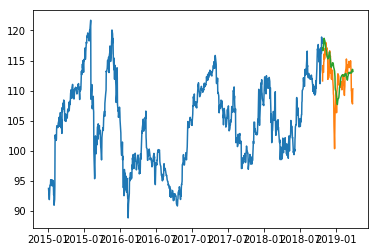

In [14]:
disney_one = np.zeros((105,1))
disney_cp = np.copy(d_test_x)
for i in range(disney_cp.shape[0]):
    disney_one[i][0] = model.predict(disney_cp[i].reshape(1, -1, 1))[0][0]
    if i < disney_cp.shape[0] - 1:
        disney_cp[i+1][-1][0] = disney_one[i][0]
        # print (X_2[i+1])    

#closing_price = model.predict(X_test)
disney_one = d_scal.inverse_transform(disney_one)
d_vd['OneDisney'] = disney_one
plt.plot(d_td['Close'])
plt.plot(d_vd[['Close', 'OneDisney']])

Not as amazing as what we did in chapter 1, right? You can see this Disney stock stayed in a relatively small range (90, 120). And it seems oscillates more heavily.

In [15]:
m_train_x, m_train_y, m_test_x, m_test_y, m_td, m_vd, m_scal = get_train_and_test_data(micro)
b_train_x, b_train_y, b_test_x, b_test_y, b_td, b_vd, b_scal = get_train_and_test_data(boeing)

/home/litchy/Programs/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/litchy/Programs/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
m_train_x.shape, m_train_y.shape, m_test_x.shape, m_test_y.shape

((900, 60, 1), (900,), (105, 60, 1), (105, 1))

To make it simple we encapsulate the test code into a function:

In [18]:
def test_and_plot(model, test, length, td, vd, scaler):
    res = np.zeros((length,1))
    cp = np.copy(test)
    for i in range(cp.shape[0]):
        res[i][0] = model.predict(cp[i].reshape(1, -1, 1))[0][0]
        if i < cp.shape[0] - 1:
            cp[i+1][-1][0] = res[i][0]
            # print (X_2[i+1])    

    #closing_price = model.predict(X_test)
    res = scaler.inverse_transform(res)
    vd['Pred'] = res
    plt.plot(td['Close'])
    plt.plot(vd[['Close', 'Pred']])

First let's just see if the model could predict an absolutely different stock:

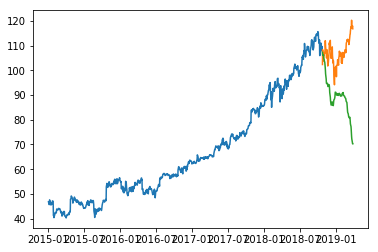

In [19]:
test_and_plot(model, m_test_x, 105, m_td, m_vd, m_scal)

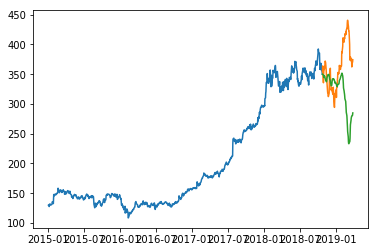

In [20]:
test_and_plot(model, b_test_x, 105, b_td, b_vd, b_scal)

Seems so bad, right? But when we train one model and use the model just to predict itself, it looks good. This may lead us to a concern, does every stock really has its pattern which is different from others? Then we may need to build a specific model for every stock.

This seems not general and powerful! So before this, let's just try another way, predicting these models using a combined dataset.

We just need to concate the training datasets, let's take a look first:

In [21]:
d_train_x.shape, d_train_y.shape

((900, 60, 1), (900,))

In [23]:
train_x = np.concatenate((d_train_x, m_train_x, b_train_x))
train_x.shape

(2700, 60, 1)

Looks good, just do it also for training labels:

In [25]:
train_y = np.concatenate((d_train_y, m_train_y, b_train_y))
train_y.shape

(2700,)

In [26]:
hib_model = Sequential()
hib_model.add(LSTM(units=50, return_sequences=True, input_shape=(train_x.shape[1],1)))
hib_model.add(LSTM(units=50))
hib_model.add(Dense(1))

hib_model.compile(loss='mean_squared_error', optimizer='adam')
hib_model.fit(train_x, train_y, epochs=4, batch_size=1, verbose=2)

Epoch 1/4
 - 139s - loss: 0.0023
Epoch 2/4
 - 128s - loss: 9.9026e-04
Epoch 3/4
 - 129s - loss: 9.6286e-04
Epoch 4/4
 - 134s - loss: 8.8624e-04


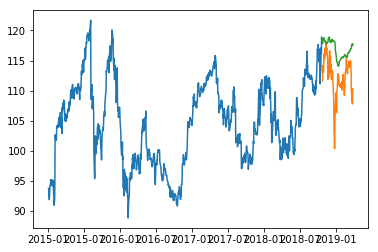

In [27]:
test_and_plot(hib_model, d_test_x, 105, d_td, d_vd, d_scal)

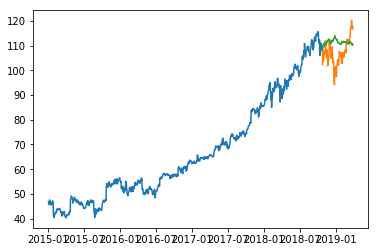

In [28]:
test_and_plot(hib_model, m_test_x, 105, m_td, m_vd, m_scal)

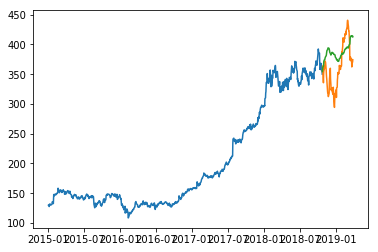

In [29]:
test_and_plot(hib_model, b_test_x, 105, b_td, b_vd, b_scal)

Seems not very powerful hhh, so let's just build a specific model for every stock. Make it automatic in next chapter!